<a href="https://colab.research.google.com/github/DaumantasL/Turing-Files/blob/main/Copy_of_135.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 1: Data Science Fundamentals

## Sprint 3: Intro to Modeling

## Spotify Challenge

<div><img style="width: 100%; " src="https://upload.wikimedia.org/wikipedia/commons/1/14/Iyyaka_Nastain_QR-Code_Spotify_Black.png" /></div>

## Background

For our sprint's project, we'll analyze top 50 most listened songs in the world on Spotify. The dataset contains several music (sound) variables about the songs, which we'll use to perform modeling with.

---------

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/DaumantasL/Turing-Files/main/top50.csv", index_col=0, encoding = "ISO-8859-1")

In [ ]:
df.head()

,TrackName,ArtistName,Genre,BeatsPerMinute,Energy,Danceability,LoudnessdB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [ ]:
df.columns = df.columns.str.replace(".", "")

In [ ]:
df.at[33, "TrackName"] = "11:11"

In [ ]:
df.describe()

,BeatsPerMinute,Energy,Danceability,LoudnessdB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


Having looked up [Spotify's current API guidelines](https://developer.spotify.com/documentation/web-api/reference/#object-audiofeaturesobject), where the same "Danceability" type values we have here range from 0 to 1, in combination with the min and max values we see above, probably means that the true ranges for our current values are 0 to 100 in the dataset they came from.

Knowing that and looking at the mean values and standard deviations, we can make some quick assumptions without doing any deeper analysis - the whole group of these songs are higher energy (Energy) and better to dance to (Danceability) than average, they're not very "Live", "Acoustic", or "Speechy", and it basically doesn't matter for a song's popularity whether it's a sad or happy one (Valence).

The other group of values we have are Beats per minute, Loudness, and Length, which are objective values of the songs' physical features rather than aggregated judgements about them.

Text(0.5, 1.0, 'Correlation heatmap')

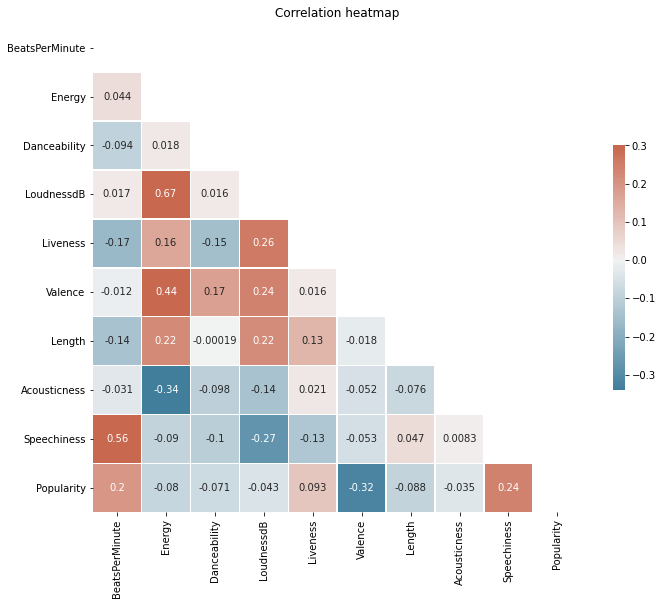

In [ ]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, mask=mask, annot=True, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}
            ).set_title("Correlation heatmap")

So here's something interesting - acccording to the data in our sample, Danceability has barely any relationship with popularity, even though earlier we guessed that Popular songs are likely to be highly Danceable. Why is that?

Well, what we have at our hands is obviously not a random sample of all songs on Spotify. And so a relationship that holds between a part of the whole and the whole itself may not be present when we're just looking at the part.

This affects what we will be able to say about our results later. We can't really say what kind of features music genres have in general, but we can say something about features the most popular representatives of a genre have.


In [ ]:
import pandas as pd

from sklearn.cluster import KMeans

X, _ = make_blobs(n_samples=10, centers=3, n_features=4)

df = pd.DataFrame(X, columns=['Feat_1', 'Feat_2', 'Feat_3', 'Feat_4'])

kmeans = KMeans(n_clusters=3)

y = kmeans.fit_predict(df[['Feat_1', 'Feat_2', 'Feat_3', 'Feat_4']])

df['Cluster'] = y

print(df.head())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


     Feat_1    Feat_2    Feat_3     Feat_4  Cluster
0  6.193025 -0.432975  5.222722  -4.692500        0
1  4.818814  0.133713  6.470631  -4.709657        0
2  3.903827 -0.231483  5.358327  -5.419220        0
3 -2.404028 -5.874985  3.047976  11.144385        2
4 -2.464092 -5.606816  3.821163   8.477024        2


50/5 is often 10.

In [ ]:
X = df.loc[:, 'BeatsPerMinute':'Popularity']
kmeans = KMeans(n_clusters=10)

In [ ]:
egg = kmeans.fit(X)

In [ ]:
egg.labels_

array([8, 7, 5, 3, 1, 8, 6, 2, 9, 1, 4, 3, 0, 4, 2, 2, 4, 0, 9, 9, 9, 6,
       7, 7, 1, 8, 0, 2, 3, 3, 2, 1, 3, 2, 2, 9, 4, 5, 8, 0, 2, 3, 2, 1,
       0, 3, 5, 3, 2, 3], dtype=int32)

In [ ]:
df["KmeansCluster"] = egg.labels_

In [ ]:
df["KmeansCluster"].value_counts()

2    10
3     9
9     5
1     5
0     5
8     4
4     4
7     3
5     3
6     2
Name: KmeansCluster, dtype: int64

Looks like we have a problem - we were asked to generate lists of 5 of similar songs, but the implementation of KMeans we're using will create clusters of variable size. Giving a brief glance over the other stock clustering options sklearn provides, it doesn't look look any of them will easily do what we were asked. We're going to need to get creative.

And by "creative", I mean that we're going to steal code we barely understand, cross our fingers and hope it works.

[Stanislaw Adaszewski](https://adared.ch/constrained-k-means-implementation-in-python/) 



In [7]:
import networkx as nx
import numpy as np
import time


def constrained_kmeans(data, demand, maxiter=None, fixedprec=1e9):
	data = np.array(data)
	
	min_ = np.min(data, axis = 0)
	max_ = np.max(data, axis = 0)
	
	C = min_ + np.random.random((len(demand), data.shape[1])) * (max_ - min_)
	M = np.array([-1] * len(data), dtype=np.int)
	
	itercnt = 0
	while True:
		itercnt += 1
		
		# memberships
		g = nx.DiGraph()
		g.add_nodes_from(range(0, data.shape[0]), demand=-1) # points
		for i in range(0, len(C)):
			g.add_node(len(data) + i, demand=demand[i])
		
		# Calculating cost...
		cost = np.array([np.linalg.norm(np.tile(data.T, len(C)).T - np.tile(C, len(data)).reshape(len(C) * len(data), C.shape[1]), axis=1)])
		# Preparing data_to_C_edges...
		data_to_C_edges = np.concatenate((np.tile([range(0, data.shape[0])], len(C)).T, np.tile(np.array([range(data.shape[0], data.shape[0] + C.shape[0])]).T, len(data)).reshape(len(C) * len(data), 1), cost.T * fixedprec), axis=1).astype(np.uint64)
		# Adding to graph
		g.add_weighted_edges_from(data_to_C_edges)
		

		a = len(data) + len(C)
		g.add_node(a, demand=len(data)-np.sum(demand))
		C_to_a_edges = np.concatenate((np.array([range(len(data), len(data) + len(C))]).T, np.tile([[a]], len(C)).T), axis=1)
		g.add_edges_from(C_to_a_edges)
		
		
		# Calculating min cost flow...
		f = nx.min_cost_flow(g)
		
		# assign
		M_new = np.ones(len(data), dtype=np.int) * -1
		for i in range(len(data)):
			p = sorted(iter(f[i].items()), key=lambda x: x[1])[-1][0]
			M_new[i] = p - len(data)
			
		# stop condition
		if np.all(M_new == M):
			# Stop
			return (C, M, f)
			
		M = M_new
			
		# compute new centers
		for i in range(len(C)):
			C[i, :] = np.mean(data[M==i, :], axis=0)
			
		if maxiter is not None and itercnt >= maxiter:
			# Max iterations reached
			return (C, M, f)


def main():
	data = np.random.random((100, 3))
	t = time.time()
	(C, M, f) = constrained_kmeans(data, [25, 25, 25])
	print('Elapsed:', (time.time() - t) * 1000, 'ms')
	print('C:', C)
	print('M:', M)
	

if __name__ == '__main__':
	main()

Elapsed: 88.0582332611084 ms
C: [[0.70708013 0.47935335 0.1740675 ]
 [0.22130173 0.58606736 0.54584512]
 [0.71560961 0.4249886  0.71664227]]
M: [2 1 1 0 0 1 2 1 1 1 0 1 2 0 2 2 0 0 2 2 1 2 1 0 1 2 0 1 0 2 0 2 2 2 0 0 1
 0 0 2 0 0 1 0 1 2 2 1 0 2 1 1 1 1 1 1 1 0 1 2 0 2 1 0 1 0 2 2 1 0 1 2 0 1
 2 1 1 1 2 0 0 2 1 0 2 1 1 0 0 1 1 1 1 1 1 2 2 2 0 2]


## How to start?

Download the dataset [from Kaggle](https://www.kaggle.com/leonardopena/top50spotify2019) and read it. You should start by performing basic EDA on it. Afterwards, follow the requirements.

## Concepts to explore

We will use dimensionality reduction, do some clustering with K-means and perform linear regression.

## Requirements

* Perform basic EDA.
* Perform dimensionality reduction on song features, verify data separability by `Genre` (PCA and/or t-SNE).
* Infer `Genre` using song features with linear regression.
* Cluster songs by features. Generate lists of 5 of similar songs. Verify their similarity by actually listening to some of cluster items on Youtube / Spotify / any other streaming platform.

## Evaluation Criteria

- Code quality
- Adherence to the requirements
- Correctness of applied methods